In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 129kB/s 
     |████████████████████████████████| 983kB 40.9MB/s 
     |████████████████████████████████| 245kB 54.1MB/s 
     |████████████████████████████████| 1.3MB 53.2MB/s 
     |████████████████████████████████| 471kB 44.4MB/s 
     |████████████████████████████████| 890kB 45.3MB/s 
     |████████████████████████████████| 1.1MB 47.9MB/s 
     |████████████████████████████████| 2.9MB 52.9MB/s 
  Created wheel for ktrain: filename=ktrain-0.23.0-cp36-none-any.whl size=25271671 sha256=feaa3011b9c0a8ccd1df434323ad11c8146fe5be3bbb9f064b302a4de99ebffc
  Stored in directory: /root/.cache/pip/wheels/f2/15/d1/ada9c041daebeb09b7341e2d3d0a765bf74e512edf2caa6fa7
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=9fbb31f39cecb13e47603643ee114e6b2953343e2acfa69f60b89f12a892c073
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
data_train = pd.read_csv('train.csv')

In [ ]:
data_test = pd.read_csv('test.csv')

In [ ]:
data_train

,id,turn1,turn2,turn3,label
0,0,do not worry i am girl,hmm how do i know if you are,what ' s ur name ?,others
1,1,when did i ?,saw many times i think shame,no . i never saw you,angry
2,2,by,by google chrome,where you live,others
3,3,u r ridiculous,i might be ridiculous but i am telling the tru...,u little disgusting whore,angry
4,4,just for time pass,wt do u do 4 a living then,maybe,others
...,...,...,...,...,...
30155,30155,i do not work,i could take your shift,i am a student,others
30156,30156,i am not getting you repeated loudly crying face,why are you crying confused,because you are not making any sense,sad
30157,30157,haha,"no , seriously . what is up with that o - o",had your breakfast ?,others
30158,30158,do you sing ?,yea a lil,nice,others


In [ ]:
data_test

,id,turn1,turn2,turn3,label
0,0,hmm,what does your bio mean ?,i don ’ t have any bio,others
1,1,what you like,very little things,ok,others
2,2,yes,how so ?,i want to fuck babu,others
3,3,what did you guess,what what,fuck,others
4,4,we ?,of course we will !,what gender movies you like confused,others
...,...,...,...,...,...
5504,5504,not you elongated,i also did not not not .,how to all elongated,others
5505,5505,welcome,"why , thank you .","i do not know , you tell",others
5506,5506,yes,scream if only i could afford this,how are you,others
5507,5507,for my information,it ' s our responsibility to clarify everything .,what is mountain dew ?,others


In [ ]:
data_train['review'] = data_train['turn1'] + data_train['turn2'] + data_train['turn3']

In [ ]:
data_test['review'] = data_test['turn1'] + data_test['turn2'] + data_test['turn3']

In [ ]:
data_train.drop(data_train[['id', 'turn1', 'turn2', 'turn3']], inplace=True, axis=1)
data_test.drop(data_test[['id', 'turn1', 'turn2', 'turn3']], inplace=True, axis=1)

In [ ]:
data_train.dropna(inplace=True)
data_test.dropna(inplace=True)

In [ ]:
data_train = data_train[['review', 'label']]
data_test = data_test[['review', 'label']]

In [ ]:
data_train

,review,label
0,do not worry i am girlhmm how do i know if you...,others
1,when did i ?saw many times i think shameno . i...,angry
2,byby google chromewhere you live,others
3,u r ridiculousi might be ridiculous but i am t...,angry
4,just for time passwt do u do 4 a living thenmaybe,others
...,...,...
30155,i do not worki could take your shifti am a stu...,others
30156,i am not getting you repeated loudly crying fa...,sad
30157,"hahano , seriously . what is up with that o - ...",others
30158,do you sing ?yea a lilnice,others


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


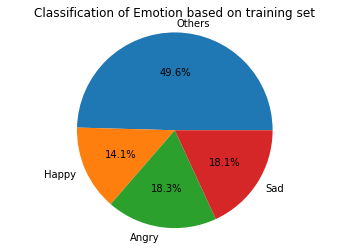

In [ ]:
import matplotlib.pyplot as plt

labels = ['Others', 'Happy', 'Angry', 'Sad']
sizes = [[data_train[data_train.label == 'others'].shape[0]], [data_train[data_train.label == 'happy'].shape[0]], [data_train[data_train.label == 'angry'].shape[0]], [data_train[data_train.label == 'sad'].shape[0]]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Classification of Emotion based on training set')

plt.show()

In [ ]:
data_test.label.unique()

array(['others', 'happy', 'angry', 'sad'], dtype=object)

In [ ]:
data_test

,review,label
0,hmmwhat does your bio mean ?i don ’ t have any...,others
1,what you likevery little thingsok,others
2,yeshow so ?i want to fuck babu,others
3,what did you guesswhat whatfuck,others
4,we ?of course we will !what gender movies you ...,others
...,...,...
5504,not you elongatedi also did not not not .how t...,others
5505,"welcomewhy , thank you .i do not know , you tell",others
5506,yesscream if only i could afford thishow are you,others
5507,for my informationit ' s our responsibility to...,others


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


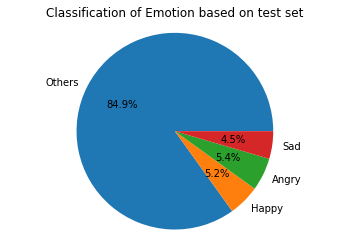

In [ ]:
import matplotlib.pyplot as plt

labels = ['Others', 'Happy', 'Angry', 'Sad']
sizes = [[data_test[data_test.label == 'others'].shape[0]], [data_test[data_test.label == 'happy'].shape[0]], [data_test[data_test.label == 'angry'].shape[0]], [data_test[data_test.label == 'sad'].shape[0]]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Classification of Emotion based on test set')

plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'review',
                                                                   label_columns = 'label',
                                                                   val_df = data_test,
                                                                   maxlen = 500,
                                                                   preprocess_mode = 'bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 500
done.


In [ ]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs = 1)

predictor = ktrain.get_predictor(learner.model, preproc)



begin training using onecycle policy with max lr of 2e-05...
5027/5027 [==============================] - 5289s 1s/step - loss: 0.4402 - accuracy: 0.8406 - val_loss: 0.2980 - val_accuracy: 0.8938


In [ ]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

In [ ]:
score = model.evaluate(x=X_test, y=y_test)
score[1]

173/173 [==============================] - 238s 1s/step - loss: 0.2980 - accuracy: 0.8938


0.8938101530075073